In [1]:
print(__doc__)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle

Automatically created module for IPython interactive environment


In [2]:
df_data = pd.read_pickle('./saved_variables/df_data')
df_X, df_y, df_data = pd.read_pickle('saved_variables/df_X_y_data')
X_train, X_test, y_train, y_test = pd.read_pickle('./saved_variables/X_y_train_test')
feature_names, class_names = pd.read_pickle('saved_variables/feature_class_names')

In [3]:
df_data.columns

Index(['id', 'diagnosis', 'diagnosis_num', 'radius_mean', 'texture_mean',
       'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean',
       'concavity_mean', 'concave_points_mean', 'symmetry_mean',
       'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se',
       'area_se', 'smoothness_se', 'compactness_se', 'concavity_se',
       'concave_points_se', 'symmetry_se', 'fractal_dimension_se',
       'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst',
       'smoothness_worst', 'compactness_worst', 'concavity_worst',
       'concave_points_worst', 'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [15]:
import plotly.express as px
fig = px.scatter_3d(df_data, x='area_mean', y='compactness_mean', z='texture_mean',
              color='diagnosis', symbol='diagnosis', opacity=1, width=900) #size=''

# tight layout
#fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))
fig.show()

# Editble Datatable

# Parrallel Coordinate Plot

In [ ]:
categorical_dimensions = ['body-style', 'drive-wheels', 'fuel-type']

dimensions = [dict(values=cars_df[label], label=label) for label in categorical_dimensions]


In [13]:
import plotly.graph_objects as go

import pandas as pd

df = pd.read_csv("https://raw.githubusercontent.com/bcdunbar/datasets/master/parcoords_data.csv")

fig = go.Figure(data=
    go.Parcoords(
        line = dict(color = df['colorVal'],
                   colorscale = 'Electric',
                   showscale = True,
                   cmin = -4000,
                   cmax = -100),
        dimensions = list([
            dict(range = [32000,227900],
                 constraintrange = [100000,150000],
                 label = "Block Height", values = df['blockHeight']),
            dict(range = [0,700000],
                 label = 'Block Width', values = df['blockWidth']),
            dict(tickvals = [0,0.5,1,2,3],
                 ticktext = ['A','AB','B','Y','Z'],
                 label = 'Cyclinder Material', values = df['cycMaterial']),
            dict(range = [-1,4],
                 tickvals = [0,1,2,3],
                 label = 'Block Material', values = df['blockMaterial']),
            dict(range = [134,3154],
                 visible = True,
                 label = 'Total Weight', values = df['totalWeight']),
            dict(range = [9,19984],
                 label = 'Assembly Penalty Wt', values = df['assemblyPW']),
            dict(range = [49000,568000],
                 label = 'Height st Width', values = df['HstW'])])
    )
)
fig.show()

In [14]:
import plotly.graph_objects as go
import ipywidgets as widgets
import pandas as pd
import numpy as np

cars_df = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/imports-85.csv')

# Build parcats dimensions
categorical_dimensions = ['body-style', 'drive-wheels', 'fuel-type']

dimensions = [dict(values=cars_df[label], label=label) for label in categorical_dimensions]

# Build colorscale
color = np.zeros(len(cars_df), dtype='uint8')
colorscale = [[0, 'gray'], [0.33, 'gray'],
              [0.33, 'firebrick'], [0.66, 'firebrick'],
              [0.66, 'blue'], [1.0, 'blue']]
cmin = -0.5
cmax = 2.5

# Build figure as FigureWidget
fig = go.FigureWidget(
    data=[go.Scatter(x=cars_df.horsepower, y=cars_df['highway-mpg'],
                marker={'color': color, 'cmin': cmin, 'cmax': cmax,
                        'colorscale': colorscale, 'showscale': True,
                        'colorbar': {'tickvals': [0, 1, 2], 'ticktext': ['None', 'Red', 'Blue']}},
                     mode='markers'),

      go.Parcats(domain={'y': [0, 0.4]}, dimensions=dimensions,
                   line={'colorscale': colorscale, 'cmin': cmin,
                   'cmax': cmax, 'color': color, 'shape': 'hspline'})]
)

fig.update_layout(height=800, xaxis={'title': 'Horsepower'},
                  yaxis={'title': 'MPG', 'domain': [0.6, 1]},
                  dragmode='lasso', hovermode='closest')

# Build color selection widget
color_toggle = widgets.ToggleButtons(
    options=['None', 'Red', 'Blue'],
    index=1, description='Brush Color:', disabled=False)

# Update color callback
def update_color(trace, points, state):
    # Compute new color array
    new_color = np.array(fig.data[0].marker.color)
    new_color[points.point_inds] = color_toggle.index

    with fig.batch_update():
        # Update scatter color
        fig.data[0].marker.color = new_color

        # Update parcats colors
        fig.data[1].line.color = new_color

# Register callback on scatter selection...
fig.data[0].on_selection(update_color)
# and parcats click
fig.data[1].on_click(update_color)

# Display figure
widgets.VBox([color_toggle, fig])

# Partial Dependence Plot

In [8]:
import chart_studio.plotly as py
import plotly.graph_objs as go
from plotly import tools

#from __future__ import print_function
#print(__doc__)

import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble.partial_dependence import plot_partial_dependence
from sklearn.ensemble.partial_dependence import partial_dependence
from sklearn.datasets.california_housing import fetch_california_housing

C:\Users\blake\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning:

The sklearn.datasets.california_housing module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.



In [10]:
X_train, X_test, y_train, y_test = pd.read_pickle('./saved_variables/X_y_train_test')
df_X, df_y, df_data = pd.read_pickle('saved_variables/df_X_y_data')
feature_names, class_names = pd.read_pickle('saved_variables/feature_class_names')

In [9]:
def matplotlib_to_plotly(cmap, pl_entries):
    h = 1.0/(pl_entries-1)
    pl_colorscale = []
    
    for k in range(pl_entries):
        C = map(np.uint8, np.array(cmap(k*h)[:3])*255)
        pl_colorscale.append([k*h, 'rgb'+str((C[0], C[1], C[2]))])
        
    return pl_colorscale

Training GBRT...
 done.
Convenience plot with ``partial_dependence_plots``


C:\Users\blake\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning:

Function plot_partial_dependence is deprecated; The function ensemble.plot_partial_dependence has been deprecated in favour of sklearn.inspection.plot_partial_dependence in  0.21 and will be removed in 0.23.



Custom 3d plot via ``partial_dependence``


C:\Users\blake\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning:

Function partial_dependence is deprecated; The function ensemble.partial_dependence has been deprecated in favour of inspection.partial_dependence in 0.21 and will be removed in 0.23.



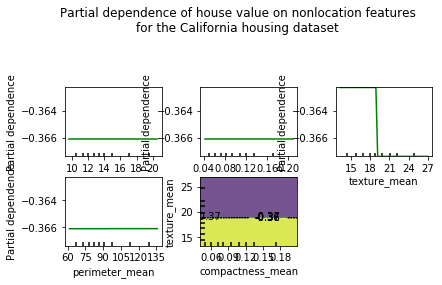

<Figure size 432x288 with 0 Axes>

In [11]:
#cal_housing = fetch_california_housing()

## split 80/20 train-test
#X_train, X_test, y_train, y_test = train_test_split(cal_housing.data,
#                                                    cal_housing.target,
#                                                    test_size=0.2,
#                                                    random_state=1)
names = feature_names

print("Training GBRT...")
clf = GradientBoostingRegressor(n_estimators=100, max_depth=4,
                                learning_rate=0.1, loss='huber',
                                random_state=1)
clf.fit(X_train, y_train)
print(" done.")

print('Convenience plot with ``partial_dependence_plots``')

features = [0, 5, 1, 2, (5, 1)]
fig, axs = plot_partial_dependence(clf, X_train, features,
                                   feature_names=names,
                                   n_jobs=3, grid_resolution=50)
fig.suptitle('Partial dependence of house value on nonlocation features\n'
             'for the California housing dataset')
print('Custom 3d plot via ``partial_dependence``')
fig = plt.figure()

target_feature = (1, 5)
pdp, axes = partial_dependence(clf, target_feature,
                               X=X_train, grid_resolution=50)
XX, YY = np.meshgrid(axes[0], axes[1])
Z = pdp[0].reshape(list(map(np.size, axes))).T
plt.show()

In [12]:
surf = go.Surface(x=XX, y=YY, z=Z,
                  colorscale=matplotlib_to_plotly(plt.cm.BuPu, 10),
                 )

layout = go.Layout(title='Partial dependence of house value on median age and '
                          'average occupancy',
                   scene=dict(xaxis=dict(title=names[target_feature[0]],
                                         showticklabels=False),
                              yaxis=dict(title=names[target_feature[1]],
                                         showticklabels=False),
                              zaxis=dict(title='Partial dependence',
                                         showticklabels=False))
                   )
fig = go.Figure(data = [surf], layout=layout)

TypeError: 'map' object is not subscriptable

In [ ]:
py.iplot(fig)